# Scaling Numeric Data
Goal is to predict the values of single unit properties using the obervations from 2017

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.model_selection import train_test_split


# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire data
import env
import wrangle

In [2]:
train, validate, test = wrangle.wrangle_zillow()
train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
2086451,3,2.5,1746,329842,1979,3281.70,6059
1608617,2,2.0,1503,378681,1980,3779.86,6059
854792,4,4.0,2469,3464540,1950,41401.23,6037
2066831,2,1.0,1507,78173,1952,1477.34,6037
2508263,2,2.0,1150,54832,1966,1139.31,6037
...,...,...,...,...,...,...,...
2578047,1,1.0,678,294384,1990,3804.80,6059
972773,4,2.0,1392,173600,1955,2840.54,6037
2204227,3,2.0,1370,339532,1977,3854.74,6059
994295,2,3.0,1204,305000,1979,3747.38,6037


1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution 

Text(0.5, 1.0, 'Scaled')

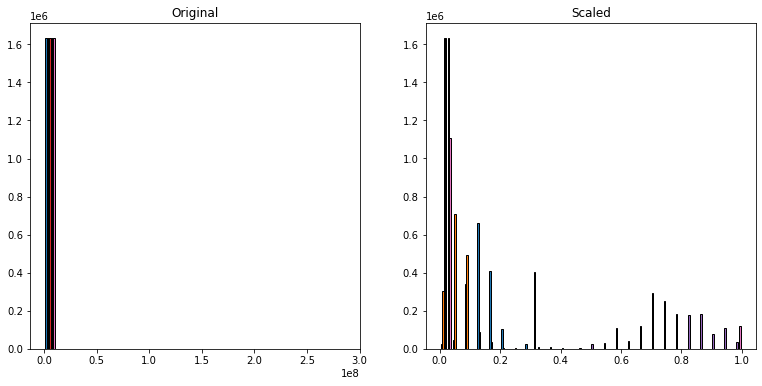

In [3]:
scaler = MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(train)

train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?
- No, it's not the exact same as the original data, due to assumed rounding errors.

Text(0.5, 1.0, 'Original Train Data')

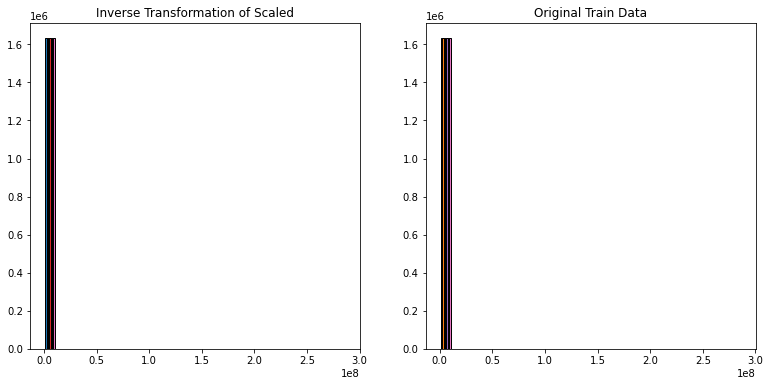

In [4]:
train_scaled = scaler.inverse_transform(train_scaled)
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Inverse Transformation of Scaled')

plt.subplot(122)
plt.hist(train, bins=25, ec='black')
plt.title('Original Train Data')

In [5]:
train_scaled == train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
2086451,True,True,False,True,False,True,True
1608617,True,True,True,True,True,True,True
854792,True,True,True,True,True,True,True
2066831,True,True,True,True,True,True,True
2508263,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
2578047,True,True,True,True,False,False,True
972773,True,True,True,True,True,True,True
2204227,True,True,True,True,True,False,True
994295,True,True,True,True,False,False,True


3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [6]:
help(QuantileTransformer)

Help on class QuantileTransformer in module sklearn.preprocessing._data:

class QuantileTransformer(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  QuantileTransformer(*, n_quantiles=1000, output_distribution='uniform', ignore_implicit_zeros=False, subsample=100000, random_state=None, copy=True)
 |  
 |  Transform features using quantiles information.
 |  
 |  This method transforms the features to follow a uniform or a normal
 |  distribution. Therefore, for a given feature, this transformation tends
 |  to spread out the most frequent values. It also reduces the impact of
 |  (marginal) outliers: this is therefore a robust preprocessing scheme.
 |  
 |  The transformation is applied on each feature independently. First an
 |  estimate of the cumulative distribution function of a feature is
 |  used to map the original values to a uniform distribution. The obtained
 |  values are then mapped to the desired output distribution using the
 |  associated quantile function. 

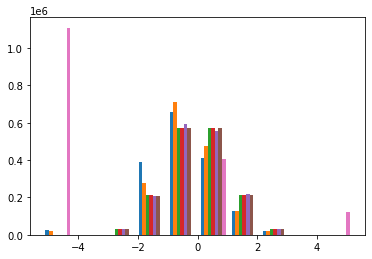

In [7]:
# Applies QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
trans_train = quantile.fit_transform(train)
plt.hist(trans_train)
plt.show()

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?
- That it's distributed much more evenly, from 0 to 1 rather than in a bell curve, from -5 to 5

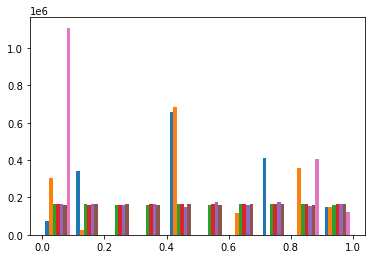

In [8]:
# Applies QuantileTransformer
quantile = QuantileTransformer()
trans_train = quantile.fit_transform(train)
plt.hist(trans_train)
plt.show()

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py (**wrangle.py** module) that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [9]:
def scale_zillow(train, validate, test,
                 cols_to_scale = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']):
    '''
    Accepts train, valide, and test as inputs from split data then returns scaled versions for each one
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    
    scaler.fit(train[cols_to_scale])
    
    train_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(train[cols_to_scale]), columns=train[cols_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(validate[cols_to_scale]), columns=validate[cols_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[cols_to_scale] = pd.DataFrame(scaler.transform(test[cols_to_scale]), columns=test[cols_to_scale].columns.values).set_index([test.index.values])
    
    return train_scaled, validate_scaled, test_scaled

In [12]:
train_scaled, validate_scaled, test_scaled = scale_zillow(train, validate, test)
train_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
2086451,0.142857,0.080645,0.002127,0.001149,1979,3281.70,6059
1608617,0.095238,0.064516,0.001831,0.001319,1980,3779.86,6059
854792,0.190476,0.129032,0.003009,0.012067,1950,41401.23,6037
2066831,0.095238,0.032258,0.001836,0.000272,1952,1477.34,6037
2508263,0.095238,0.064516,0.001401,0.000191,1966,1139.31,6037
...,...,...,...,...,...,...,...
2578047,0.047619,0.032258,0.000825,0.001025,1990,3804.80,6059
972773,0.190476,0.064516,0.001696,0.000605,1955,2840.54,6037
2204227,0.142857,0.064516,0.001669,0.001183,1977,3854.74,6059
994295,0.095238,0.096774,0.001467,0.001062,1979,3747.38,6037
